In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly as ex
import seaborn as sns
import statsmodels.api as sm
from scipy.signal import savgol_filter
import os
from store_path import folder_path
from store_path import run_path


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
panel = f'{run_path}/panel_0112.xlsx'

df = pd.read_excel(panel)

In [3]:
df['city'] = [0]*4509

for i in range(4509):
    if (df['place_id'].iloc[i] == 1) | (df['place_id'].iloc[i] == 5): ## top2
        ## if (place_id <= 3) | (place_id == 5) | (place_id == 6) ## top5
        df['city'].iloc[i] = 1

C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\465775290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\465775290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\465775290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppData

In [4]:
df

,year,month,ym,place,place_id,growth,num,total_num,city_size,policy,after_policy,city
0,99,1,1,彰化市,1,0.152174,530,237170,26,0.0,0.0,1
1,99,2,2,彰化市,1,0.067925,566,236471,26,0.0,0.0,1
2,99,3,3,彰化市,1,-0.284452,405,236646,26,0.0,0.0,1
3,99,4,4,彰化市,1,0.358025,550,236633,26,0.0,0.0,1
4,99,5,5,彰化市,1,-0.172727,455,236065,26,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4504,112,7,163,全縣,27,0.175291,2930,1277824,27,NaN,1.0,0
4505,112,8,164,全縣,27,-0.236860,2236,1272802,27,NaN,1.0,0
4506,112,9,165,全縣,27,0.212433,2711,1266670,27,NaN,1.0,0
4507,112,10,166,全縣,27,0.037993,2814,1255330,27,NaN,1.0,0


In [5]:
test = df.loc[(df['ym'] == 167) & (df['city'] == 0)].reset_index(drop = True)
test['growth'].mean()

0.3321650838374462

In [6]:
df.loc[df['ym'] == 167].groupby(['city'])['growth'].mean()[1]

0.764982576769649

In [7]:
type(df.loc[df['ym'] == 167].groupby(['city'])['growth'].mean())

pandas.core.series.Series

In [8]:
test = df.loc[df['ym'] == 167].groupby(['city'])['growth'].mean().to_list()
test[0]

0.33216508383744625

In [9]:
city_growth_li = []
city_num_li = []

rural_growth_li = []
rural_num_li = []

for i in range(1,168):
    mean_num = df.loc[df['ym'] == i].groupby(['city'])['num'].mean().to_list()
    mean_growth = df.loc[df['ym'] == i].groupby(['city'])['growth'].mean().to_list()
    
    rural_num_li.append(mean_num[0])
    city_num_li.append(mean_num[1])

    rural_growth_li.append(mean_growth[0])
    city_growth_li.append(mean_growth[1])

Text(0.5, 1.0, 'City v.s. Non-city Growth Rate: non-smooth, top2')

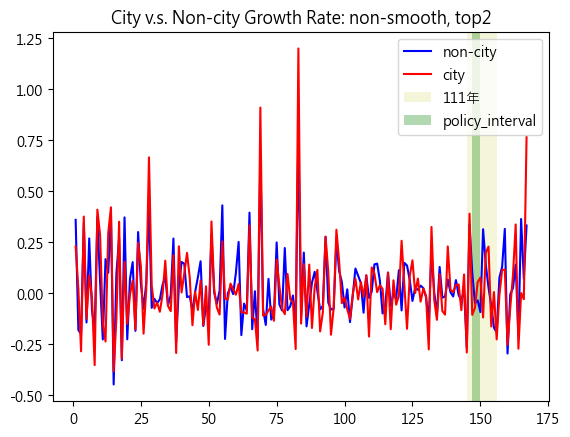

In [14]:
x_scacle = df['ym'].unique().tolist()

plt.plot(x_scacle, rural_growth_li, 'b', label = 'non-city')
plt.plot(x_scacle, city_growth_li, 'r', label = 'city')
plt.axvspan(145, 156, facecolor='y', alpha=0.15, label = "111年")
plt.axvspan(147, 150, facecolor='g', alpha=0.3, label = "policy_interval")
plt.legend(loc = 'upper right')
plt.title("City v.s. Non-city Growth Rate: non-smooth, top2")

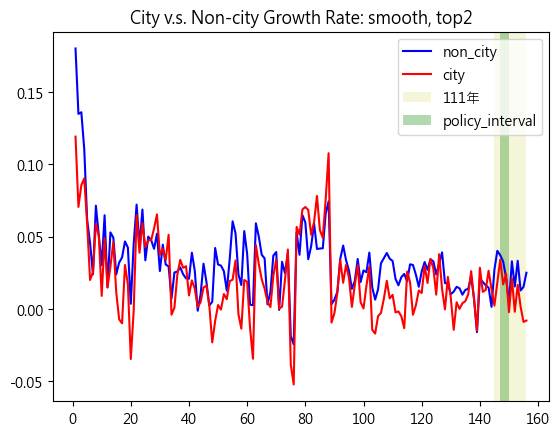

In [13]:
smooth_rural_growth = savgol_filter(rural_growth_li, 12, 1, mode = 'nearest')
smooth_city_growth = savgol_filter(city_growth_li, 12, 1, mode='nearest')


plt.plot(x_scacle[:-11], smooth_rural_growth[:-11], 'b', label = "non_city")
plt.plot(x_scacle[:-11], smooth_city_growth[:-11], 'r', label = "city")
plt.title("City v.s. Non-city Growth Rate: smooth, top2")
plt.axvspan(145, 156, facecolor='y', alpha=0.15, label = "111年")
plt.axvspan(147, 150, facecolor='g', alpha=0.3, label = "policy_interval")
plt.legend(loc = 'upper right')

## top5

In [17]:
df['city'] = [0]*4509

for i in range(4509):
    #if (df['place_id'].iloc[i] == 1) | (df['place_id'].iloc[i] == 5): ## top2
    if (df['place_id'].iloc[i] <= 3) | (df['place_id'].iloc[i] == 5) | (df['place_id'].iloc[i] == 6): ## top5
        df['city'].iloc[i] = 1

city_growth_li = []
city_num_li = []

rural_growth_li = []
rural_num_li = []

for i in range(1,168):
    mean_num = df.loc[df['ym'] == i].groupby(['city'])['num'].mean().to_list()
    mean_growth = df.loc[df['ym'] == i].groupby(['city'])['growth'].mean().to_list()
    
    rural_num_li.append(mean_num[0])
    city_num_li.append(mean_num[1])

    rural_growth_li.append(mean_growth[0])
    city_growth_li.append(mean_growth[1])

C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\1413820051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\1413820051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppData\Local\Temp\ipykernel_12540\1413820051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'].iloc[i] = 1
C:\Users\user0522\AppD

Text(0.5, 1.0, 'City v.s. Non-city Growth Rate: non-smooth, top5')

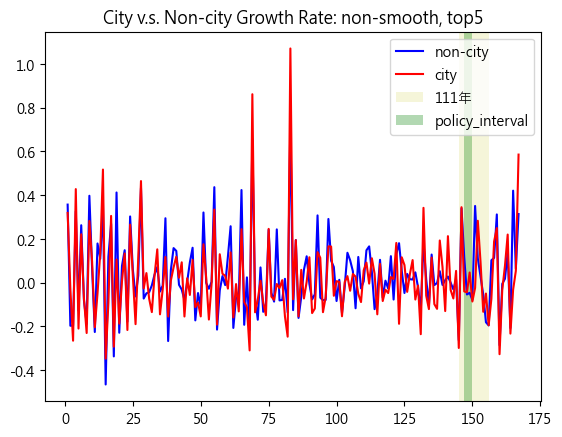

In [18]:
x_scacle = df['ym'].unique().tolist()

plt.plot(x_scacle, rural_growth_li, 'b', label = 'non-city')
plt.plot(x_scacle, city_growth_li, 'r', label = 'city')
plt.axvspan(145, 156, facecolor='y', alpha=0.15, label = "111年")
plt.axvspan(147, 150, facecolor='g', alpha=0.3, label = "policy_interval")
plt.legend(loc = 'upper right')
plt.title("City v.s. Non-city Growth Rate: non-smooth, top5")

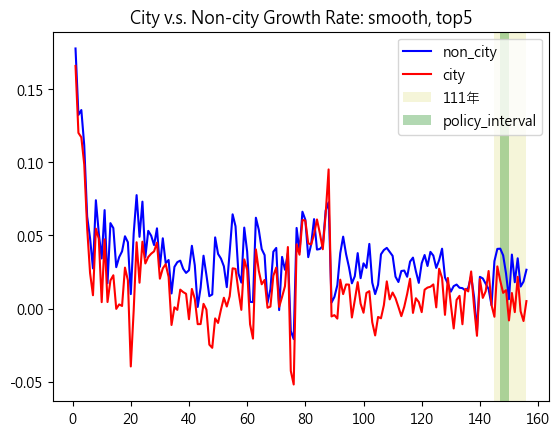

In [19]:
smooth_rural_growth = savgol_filter(rural_growth_li, 12, 1, mode = 'nearest')
smooth_city_growth = savgol_filter(city_growth_li, 12, 1, mode='nearest')


plt.plot(x_scacle[:-11], smooth_rural_growth[:-11], 'b', label = "non_city")
plt.plot(x_scacle[:-11], smooth_city_growth[:-11], 'r', label = "city")
plt.title("City v.s. Non-city Growth Rate: smooth, top5")
plt.axvspan(145, 156, facecolor='y', alpha=0.15, label = "111年")
plt.axvspan(147, 150, facecolor='g', alpha=0.3, label = "policy_interval")
plt.legend(loc = 'upper right')